In [9]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats

# **Game board construction**

---


In [10]:
Graph_gameboard = nx.Graph()

# Add nodes to the graph
cities = {
    'Essen': 'blue',
    'St Petersburg': 'blue',
    'Milan': 'blue',
    'Paris': 'blue',
    'London': 'blue',
    'Madrid': 'blue',
    'New York': 'blue',
    'Toronto / Montreal': 'blue',
    'Washington': 'blue',
    'Atlanta': 'blue',
    'Chicago': 'blue',
    'San Francisco': 'blue',
    'Los Angeles': 'yellow',
    'Santiago': 'yellow',
    'Lima': 'yellow',
    'Mexico City': 'yellow',
    'Miami': 'yellow',
    'Bogota': 'yellow',
    'Sao Paulo': 'yellow',
    'Buenos Aires': 'yellow',
    'Lagos': 'yellow',
    'Kinshasa': 'yellow',
    'Khartoum': 'yellow',
    'Johannesburg': 'yellow',
    'Algiers': 'black',
    'Cairo': 'black',
    'Istanbul': 'black',
    'Moscow': 'black',
    'Baghdad': 'black',
    'Riyadh': 'black',
    'Tehran': 'black',
    'Karachi': 'black',
    'Delhi': 'black',
    'Mumbai': 'black',
    'Kolkata': 'black',
    'Chennai': 'black',
    'Seoul': 'red',
    'Tokyo': 'red',
    'Osaka': 'red',
    'Beijing': 'red',
    'Shanghai': 'red',
    'Taipei': 'red',
    'Hong Kong': 'red',
    'Manila': 'red',
    'Bangkok': 'red',
    'Jakarta': 'red',
    'Ho Chi Minh City': 'red',
    'Sydney': 'red',
}

for city, color in cities.items():
    Graph_gameboard.add_node(city, color=color)

# Add edges between nodes
edges = [
    ('Essen', 'St Petersburg'),
    ('Essen', 'London'),
    ('Essen', 'Paris'),
    ('Essen', 'Milan'),
    ('San Francisco', 'Manila'),
    ('San Francisco', 'Tokyo'),
    ('San Francisco', 'Chicago'),
    ('San Francisco', 'Los Angeles'),
    ('Los Angeles', 'Chicago'),
    ('Los Angeles', 'Mexico City'),
    ('Los Angeles', 'Sydney'),
    ('Chicago', 'Toronto / Montreal'),
    ('Chicago', 'Atlanta'),
    ('Chicago', 'Mexico City'),
    ('Santiago', 'Lima'),
    ('Toronto / Montreal', 'New York'),
    ('Toronto / Montreal', 'Washington'),
    ('Atlanta', 'Washington'),
    ('Atlanta', 'Miami'),
    ('Mexico City', 'Miami'),
    ('Mexico City', 'Bogota'),
    ('Lima', 'Mexico City'),
    ('Lima', 'Bogota'),
    ('New York', 'London'),
    ('New York', 'Madrid'),
    ('New York', 'Washington'),
    ('Washington', 'Miami'),
    ('Miami', 'Bogota'),
    ('Bogota', 'Sao Paulo'),
    ('Bogota', 'Buenos Aires'),
    ('London', 'Essen'),
    ('London', 'Paris'),
    ('London', 'Madrid'),
    ('Madrid', 'Paris'),
    ('Madrid', 'Algiers'),
    ('Madrid', 'Sao Paulo'),
    ('Sao Paulo', 'Lagos'),
    ('Sao Paulo', 'Buenos Aires'),
    ('Paris', 'Milan'),
    ('Paris', 'Algiers'),
    ('Lagos', 'Khartoum'),
    ('Lagos', 'Kinshasa'),
    ('Kinshasa', 'Khartoum'),
    ('Kinshasa', 'Johannesburg'),
    ('St Petersburg', 'Moscow'),
    ('St Petersburg', 'Istanbul'),
    ('Milan', 'Istanbul'),
    ('Algiers', 'Istanbul'),
    ('Algiers', 'Cairo'),
    ('Khartoum', 'Cairo'),
    ('Istanbul', 'Moscow'),
    ('Istanbul', 'Baghdad'),
    ('Istanbul', 'Cairo'),
    ('Cairo', 'Baghdad'),
    ('Cairo', 'Riyadh'),
    ('Moscow', 'Tehran'),
    ('Baghdad', 'Tehran'),
    ('Baghdad', 'Karachi'),
    ('Baghdad', 'Riyadh'),
    ('Riyadh', 'Karachi'),
    ('Tehran', 'Delhi'),
    ('Karachi', 'Delhi'),
    ('Karachi', 'Mumbai'),
    ('Delhi', 'Kolkata'),
    ('Delhi', 'Chennai'),
    ('Delhi', 'Mumbai'),
    ('Mumbai', 'Chennai'),
    ('Seoul', 'Tokyo'),
    ('Seoul', 'Shanghai'),
    ('Seoul', 'Beijing'),
    ('Beijing', 'Shanghai'),
    ('Kolkata', 'Hong Kong'),
    ('Kolkata', 'Bangkok'),
    ('Kolkata', 'Chennai'),
    ('Chennai', 'Bangkok'),
    ('Chennai', 'Jakarta'),
    ('Tokyo', 'Osaka'),
    ('Tokyo', 'Shanghai'),
    ('Shanghai', 'Taipei'),
    ('Shanghai', 'Hong Kong'),
    ('Bangkok', 'Hong Kong'),
    ('Bangkok', 'Ho Chi Minh City'),
    ('Bangkok', 'Jakarta'),
    ('Jakarta', 'Sydney'),
    ('Osaka', 'Taipei'),
    ('Taipei', 'Manila'),
    ('Taipei', 'Hong Kong'),
    ('Hong Kong', 'Manila'),
    ('Hong Kong', 'Ho Chi Minh City'),
    ('Ho Chi Minh City', 'Manila'),
    ('Manila', 'Sydney'),
]

Graph_gameboard.add_edges_from(edges)

In [11]:
node_positions = {
    'Essen': (120, 80),
    'St Petersburg': (140, 80),
    'Milan': (140, 60),
    'Paris': (120, 60),
    'London': (100, 60),
    'Madrid': (100, 40),
    'New York': (80, 60),
    'Toronto / Montreal': (60, 60),
    'Washington': (80, 40),
    'Atlanta': (60, 40),
    'Chicago': (40, 40),
    'Los Angeles': (20, 20),
    'San Francisco': (20, 40),
    'Santiago': (40, 0),
    'Lima': (60, 0),
    'Mexico City': (60, 20),
    'Miami': (80, 20),
    'Bogota': (80, 0),
    'Sao Paulo': (100, 20),
    'Buenos Aires': (100, 0),
    'Lagos': (120, 20),
    'Kinshasa': (120, 0),
    'Khartoum': (140, 20),
    'Johannesburg': (140, 0),
    'Algiers': (140, 40),
    'Cairo': (160, 40),
    'Istanbul': (160, 60),
    'Moscow': (180, 80),
    'Baghdad': (180, 60),
    'Riyadh': (180, 40),
    'Tehran': (200, 60),
    'Karachi': (200, 40),
    'Delhi': (220, 40),
    'Mumbai': (220, 20),
    'Kolkata': (240, 40),
    'Chennai': (240, 20),
    'Seoul': (240, 80),
    'Tokyo': (260, 80),
    'Osaka': (280, 80),
    'Beijing': (240, 60),
    'Shanghai': (260, 60),
    'Taipei': (280, 60),
    'Hong Kong': (280, 40),
    'Manila': (300, 40),
    'Bangkok': (260, 20),
    'Jakarta': (260, 0),
    'Ho Chi Minh City': (280, 20),
    'Sydney': (300, 0),
}

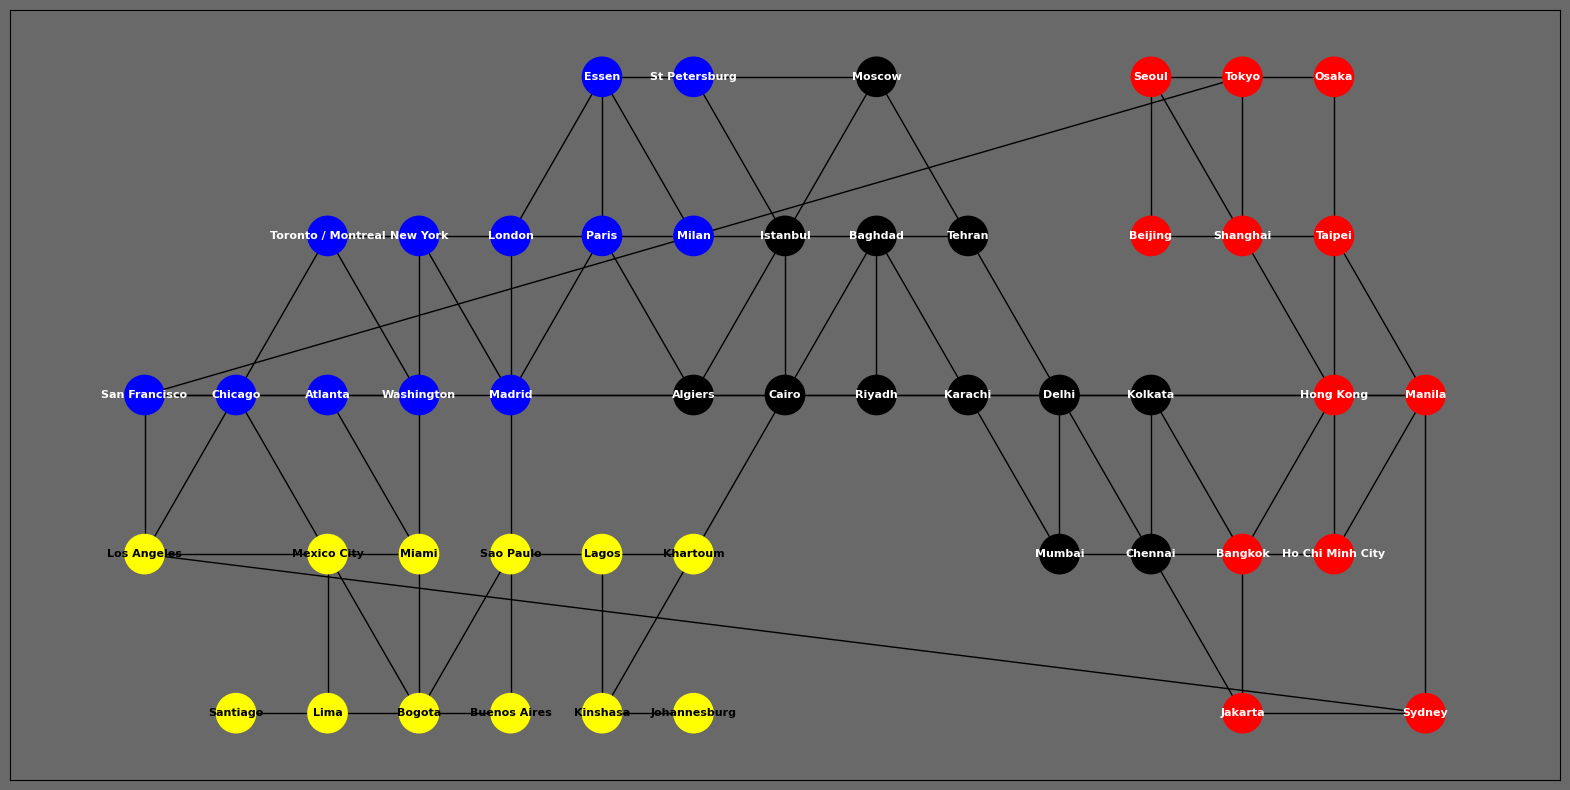

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

#pos = nx.spring_layout(Graph_gameboard)
node_colors = [cities[city] for city in Graph_gameboard.nodes()]

# change font of nodes with yellow color
yellow_nodes = [city for city, color in cities.items() if color == 'yellow']
font_colors = {city: 'black' if city in yellow_nodes else 'white' for city in Graph_gameboard.nodes()}
# Draw the nodes
nx.draw_networkx_nodes(Graph_gameboard, pos=node_positions, node_color=node_colors, node_size=800)

# Draw the edges
nx.draw_networkx_edges(Graph_gameboard, pos=node_positions)

# Add labels manually with specified colors
for node, (x, y) in node_positions.items():
    plt.text(x, y, node, fontsize=8, ha='center', va='center', color=font_colors[node], weight='bold')

#nx.draw(Graph_gameboard, pos=node_positions, node_color=node_colors, with_labels=True, font_color='white', font_weight='bold', node_size=800, font_size=8, font_family='sans-serif')
#nx.draw(Graph_gameboard, pos, node_color=node_colors, with_labels=True, font_color='white', font_weight='bold', node_size=800, font_size=8, font_family='sans-serif')

ax.set_facecolor('#696969')
fig.set_facecolor('#696969')

# Display the plot
plt.show()

# **SI, SIS, SIR, SIRS test on the game board**

---



<ipython-input-43-3fc1972fc619>:9: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  infected_nodes = random.sample(graph.nodes, num_infected)


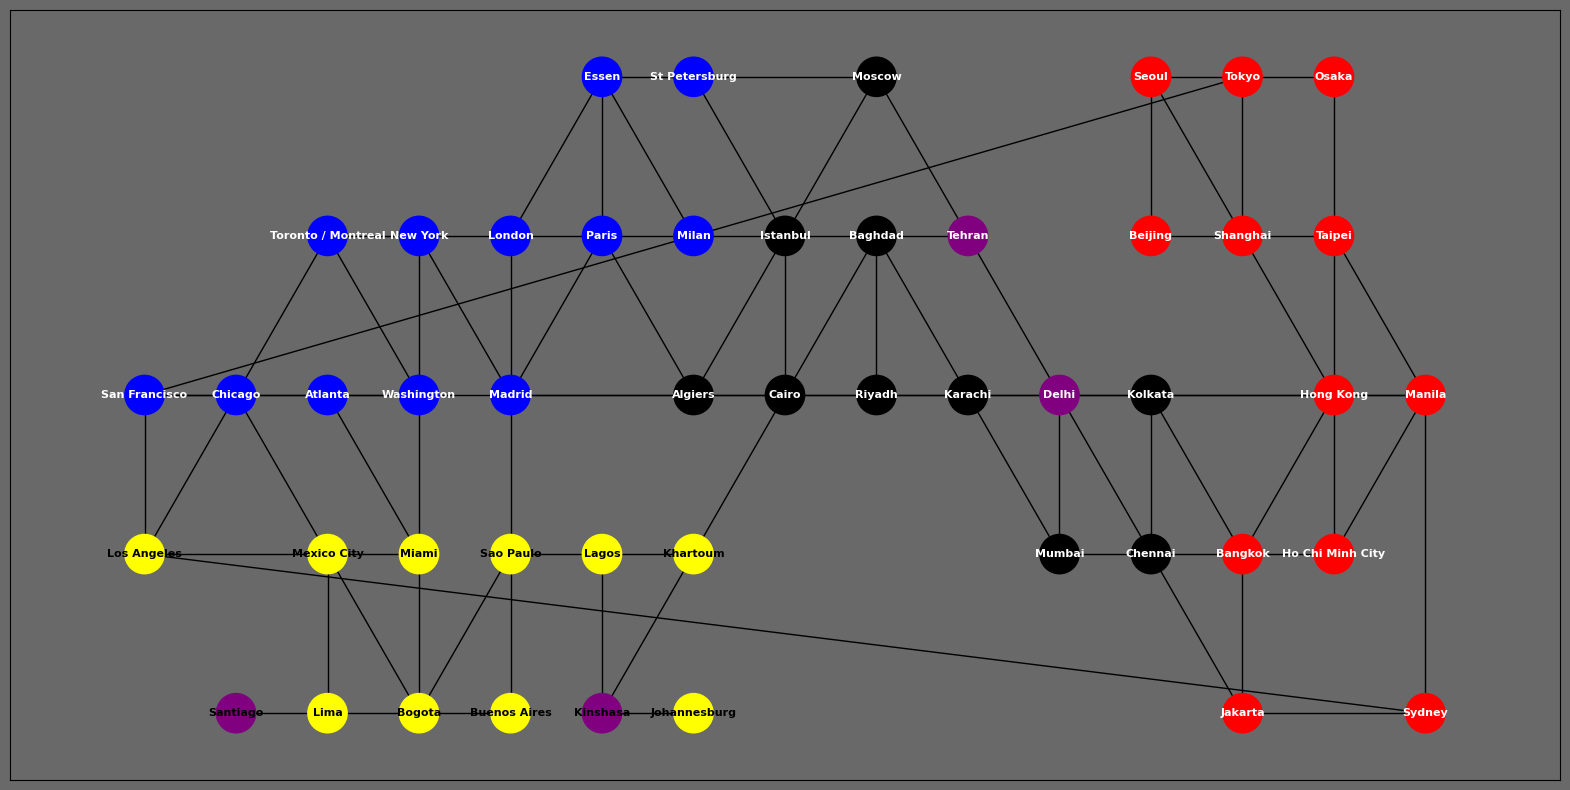

Step 1: Infected Nodes - 14


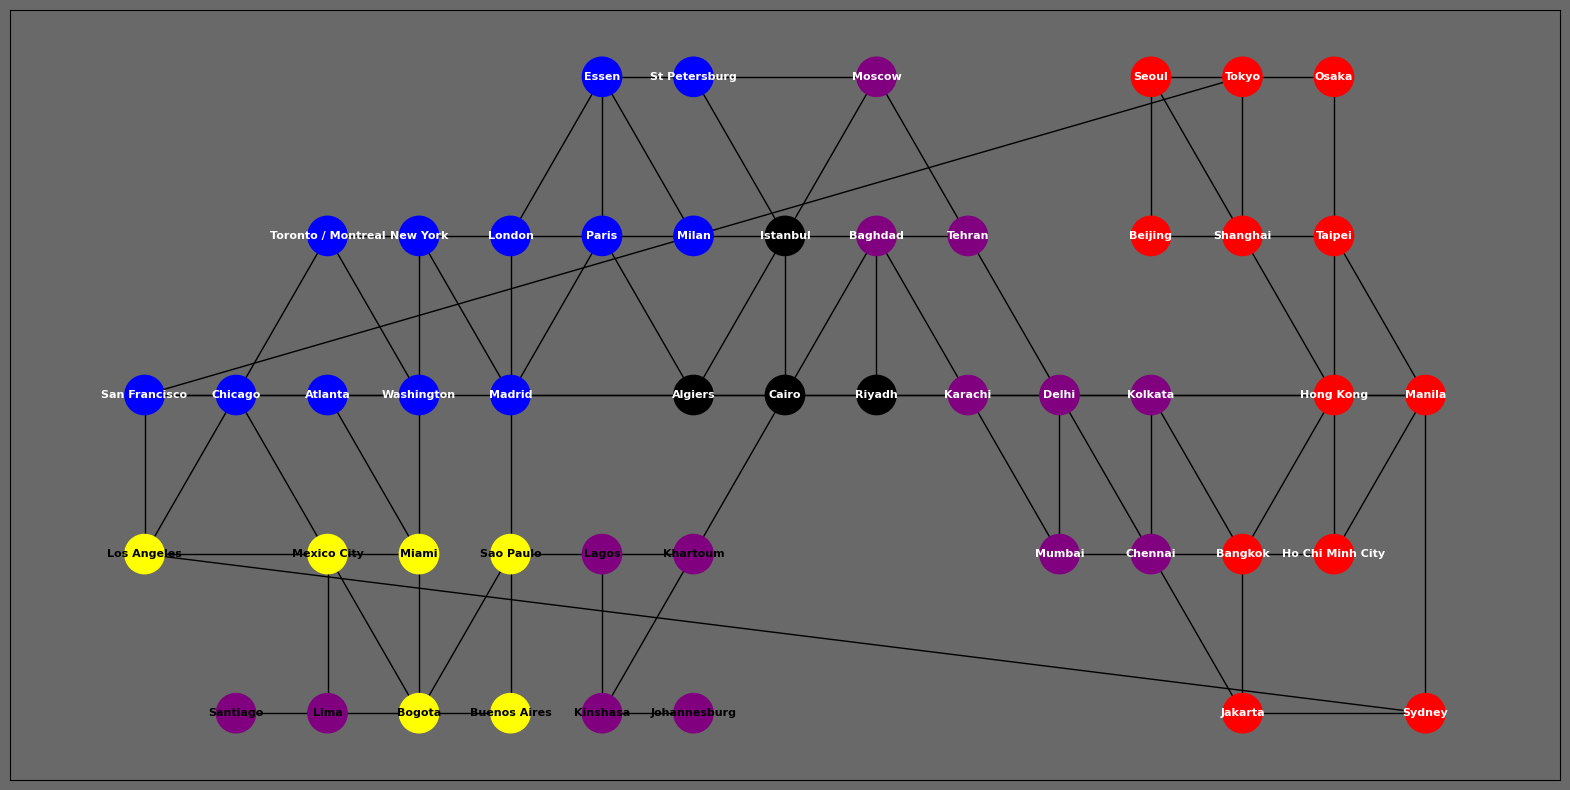

Step 2: Infected Nodes - 24


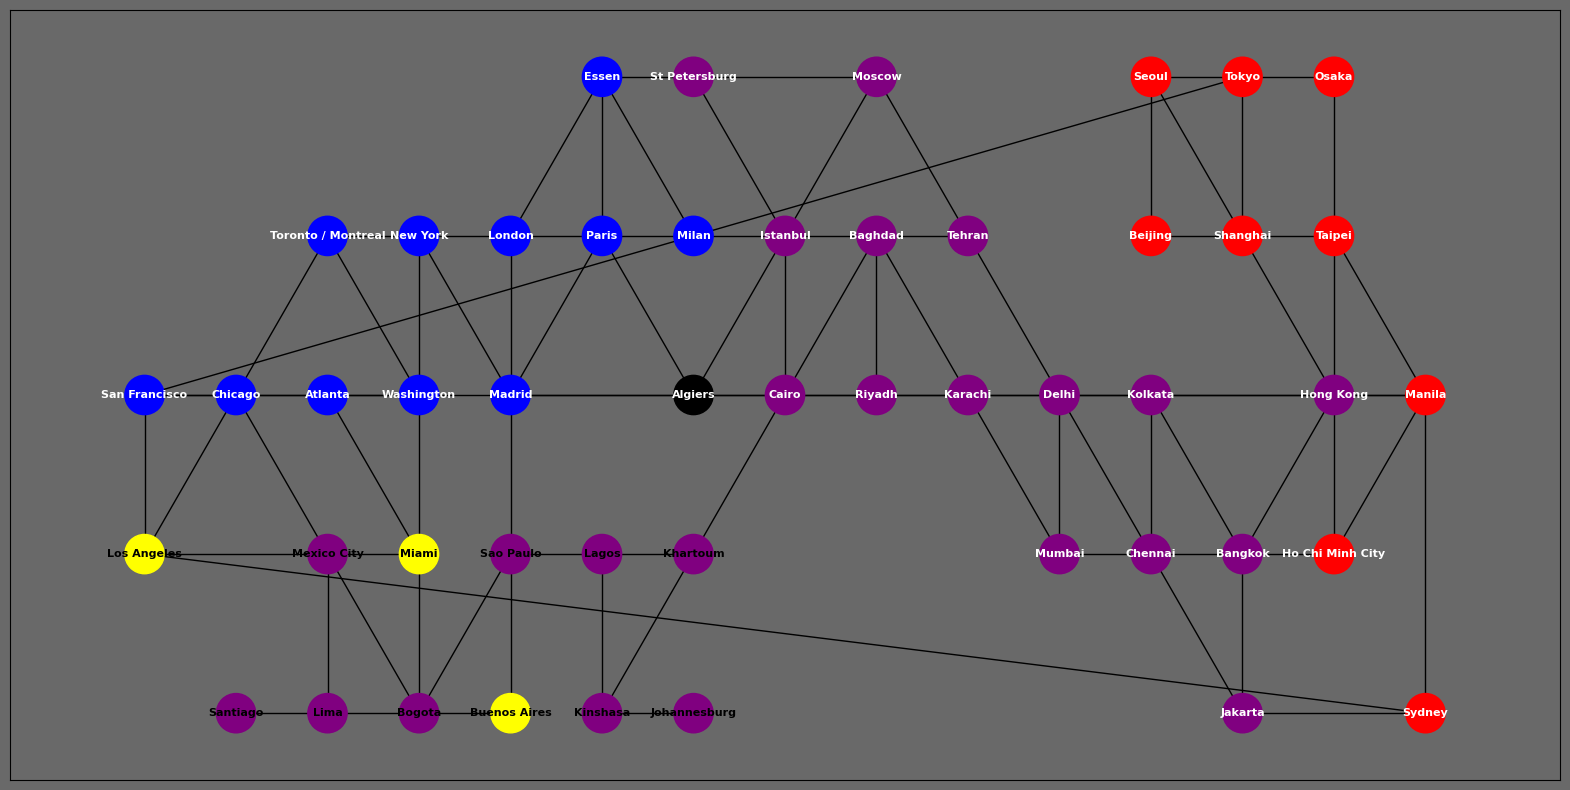

Step 3: Infected Nodes - 37


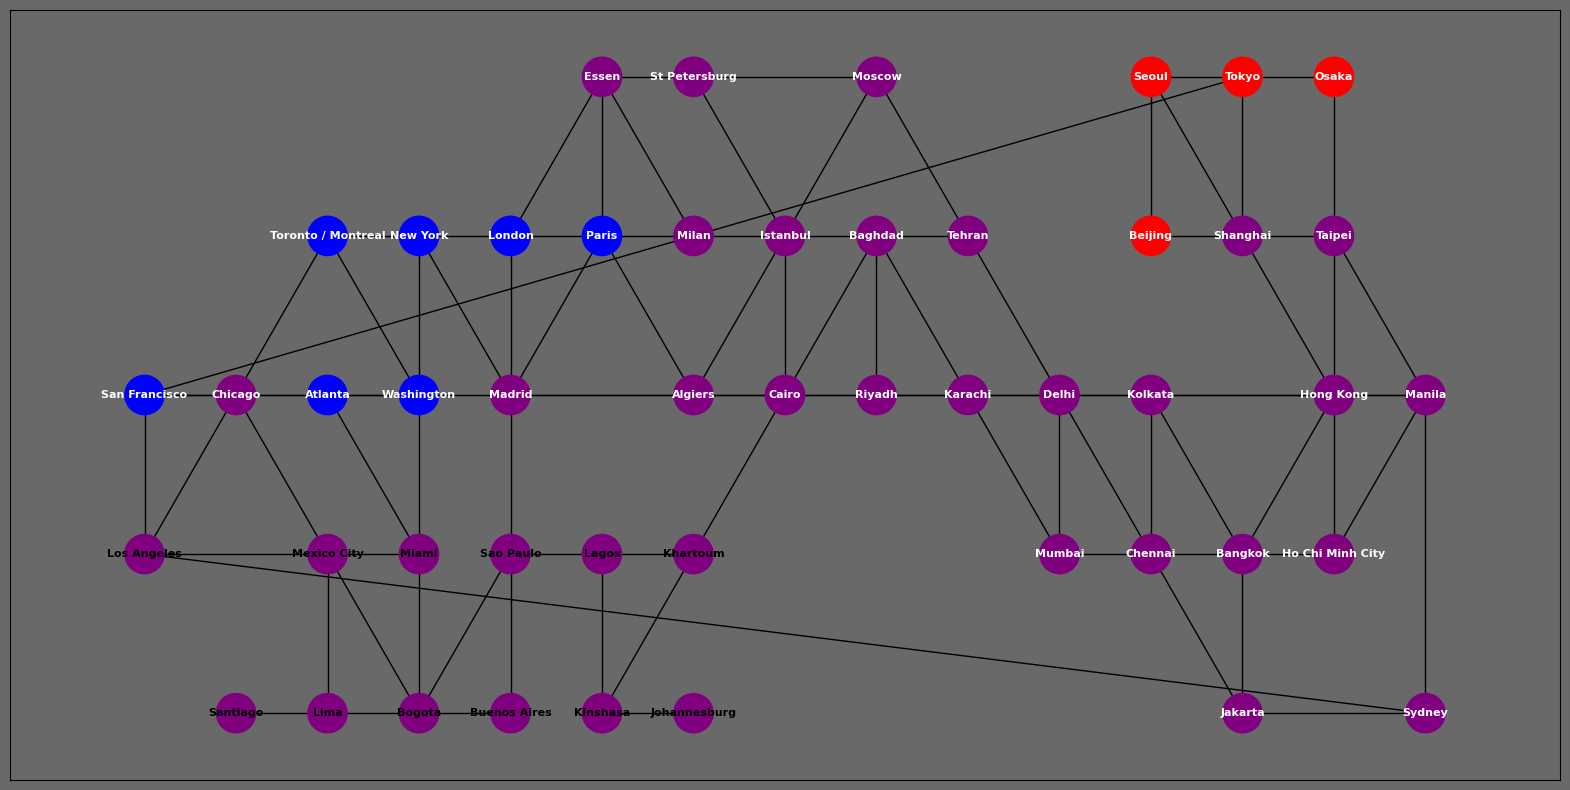

Step 4: Infected Nodes - 48


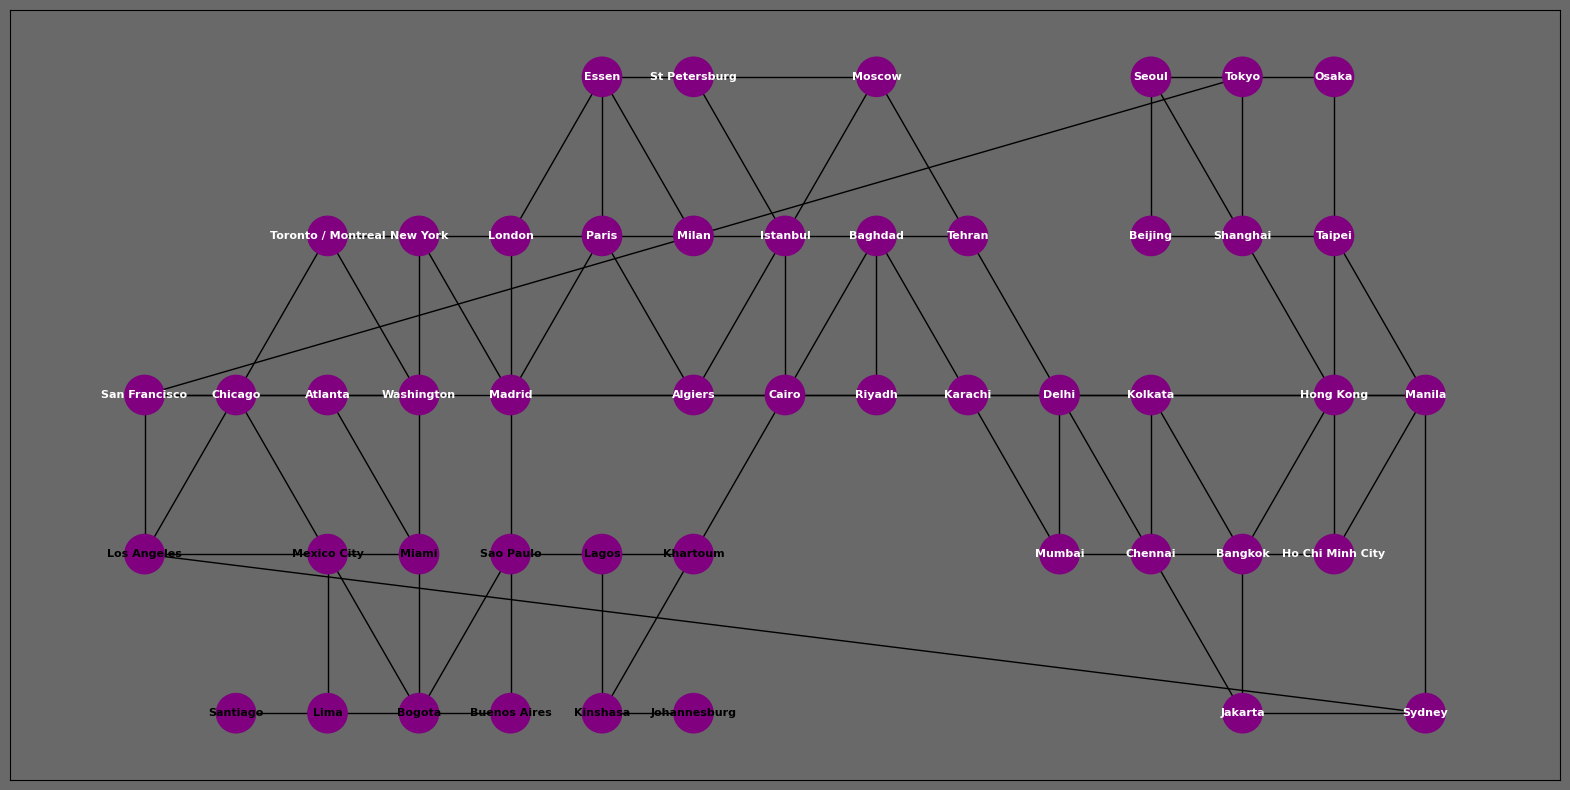

Step 5: Infected Nodes - 48


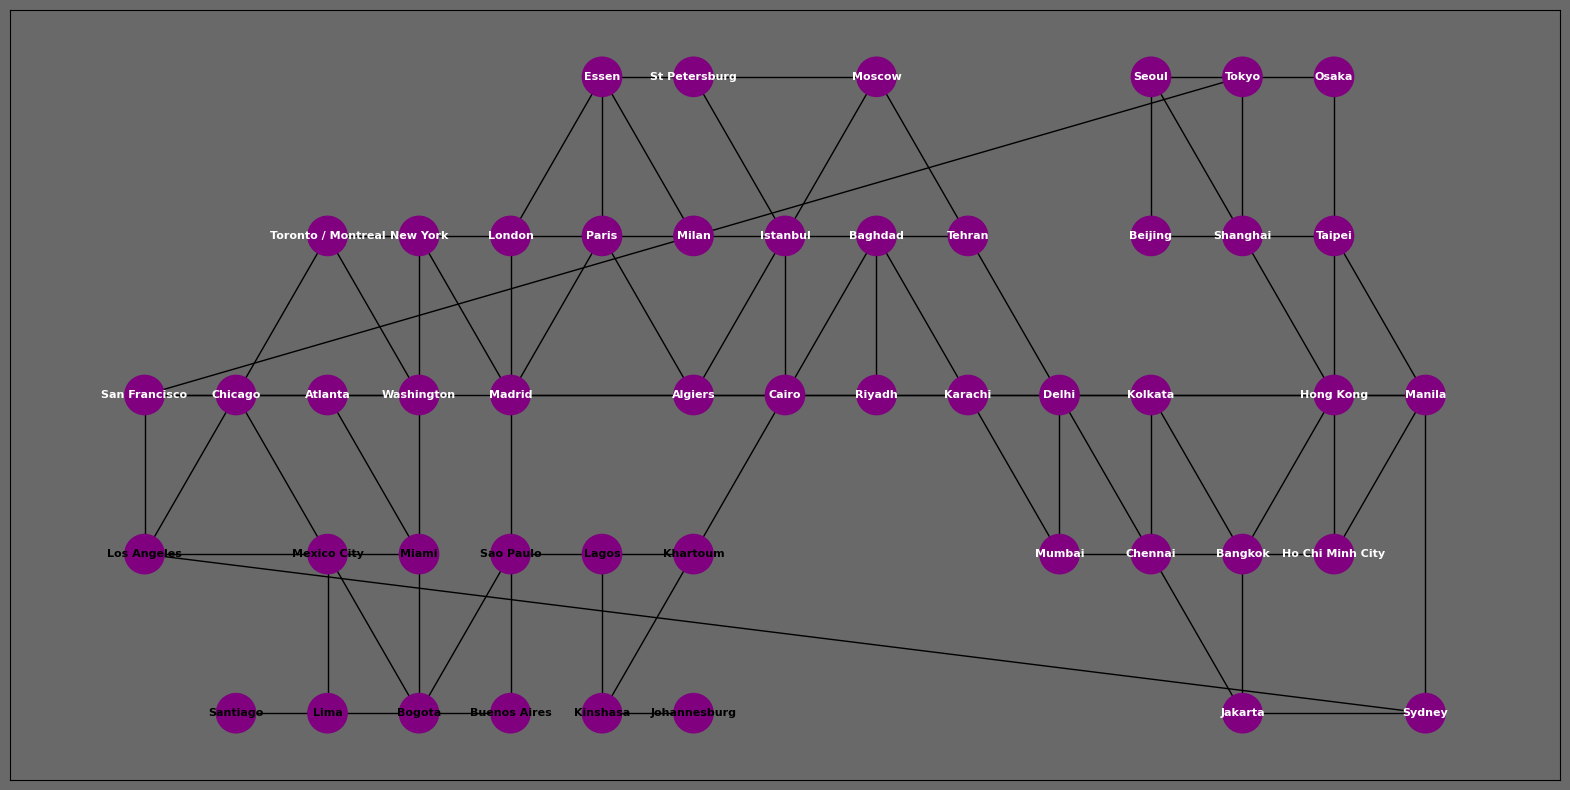

In [ ]:
def initialize_si_model(graph, initial_infected_fraction):
    num_nodes = graph.number_of_nodes()
    num_infected = int(initial_infected_fraction * num_nodes)

    infected_nodes = random.sample(graph.nodes, num_infected)

    si_model = {"graph": graph, "infected_nodes": set(infected_nodes)}

    return si_model

def plot_graph(si_model, title):
    graph = si_model["graph"]
    infected_nodes = si_model["infected_nodes"]

    fig, ax = plt.subplots(figsize=(20, 10))

    node_colors = ['purple' if city in infected_nodes else cities[city] for city in Graph_gameboard.nodes()]

    yellow_nodes = [city for city, color in cities.items() if color == 'yellow']
    font_colors = {city: 'black' if city in yellow_nodes else 'white' for city in Graph_gameboard.nodes()}

    nx.draw_networkx_nodes(Graph_gameboard, pos=node_positions, node_color=node_colors, node_size=800)

    nx.draw_networkx_edges(Graph_gameboard, pos=node_positions)

    for node, (x, y) in node_positions.items():
        plt.text(x, y, node, fontsize=8, ha='center', va='center', color=font_colors[node], weight='bold')

    ax.set_facecolor('#696969')
    fig.set_facecolor('#696969')

    plt.show()

def run_si_model(si_model, num_steps):
    graph = si_model["graph"]
    infected_nodes = si_model["infected_nodes"]

    for step in range(num_steps):
        new_infected_nodes = set()

        for node in infected_nodes:
            neighbors = set(graph.neighbors(node))
            new_infected_nodes.update(neighbors - infected_nodes)

        infected_nodes.update(new_infected_nodes)

        print(f"Step {step + 1}: Infected Nodes - {len(infected_nodes)}")
        plot_graph(si_model, f"SI Model Simulation - Step {step + 1}")

    return si_model

if __name__ == "__main__":
    initial_infected_fraction = 0.1

    si_model = initialize_si_model(Graph_gameboard, initial_infected_fraction)

    plot_graph(si_model, "Initial State")

    num_steps = 5
    si_model = run_si_model(si_model, num_steps)



# **Introduction of the 4 diseases**

---



In [12]:
# since the pandemic boardgame has 4 different diseases we will have to keep track of 4 diseases at the same time and keep a counter of the diseas cubes for every city on our map

In [68]:
disease_counters = {
    'Essen': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'St Petersburg': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Milan': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Paris': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'London': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Madrid': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'New York': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Toronto / Montreal': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Washington': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Atlanta': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Chicago': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'San Francisco': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Los Angeles': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Santiago': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Lima': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Mexico City': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Miami': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Bogota': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Sao Paulo': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Buenos Aires': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Lagos': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Kinshasa': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Khartoum': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Johannesburg': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Algiers': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Cairo': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Istanbul': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Moscow': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Baghdad': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Riyadh': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Tehran': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Karachi': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Delhi': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Mumbai': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Kolkata': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Chennai': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Seoul': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Tokyo': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Osaka': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Beijing': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Shanghai': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Taipei': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Hong Kong': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Manila': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Bangkok': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Jakarta': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Ho Chi Minh City': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
    'Sydney': {'blue': 0, 'black': 0, 'red': 0, 'yellow': 0},
}


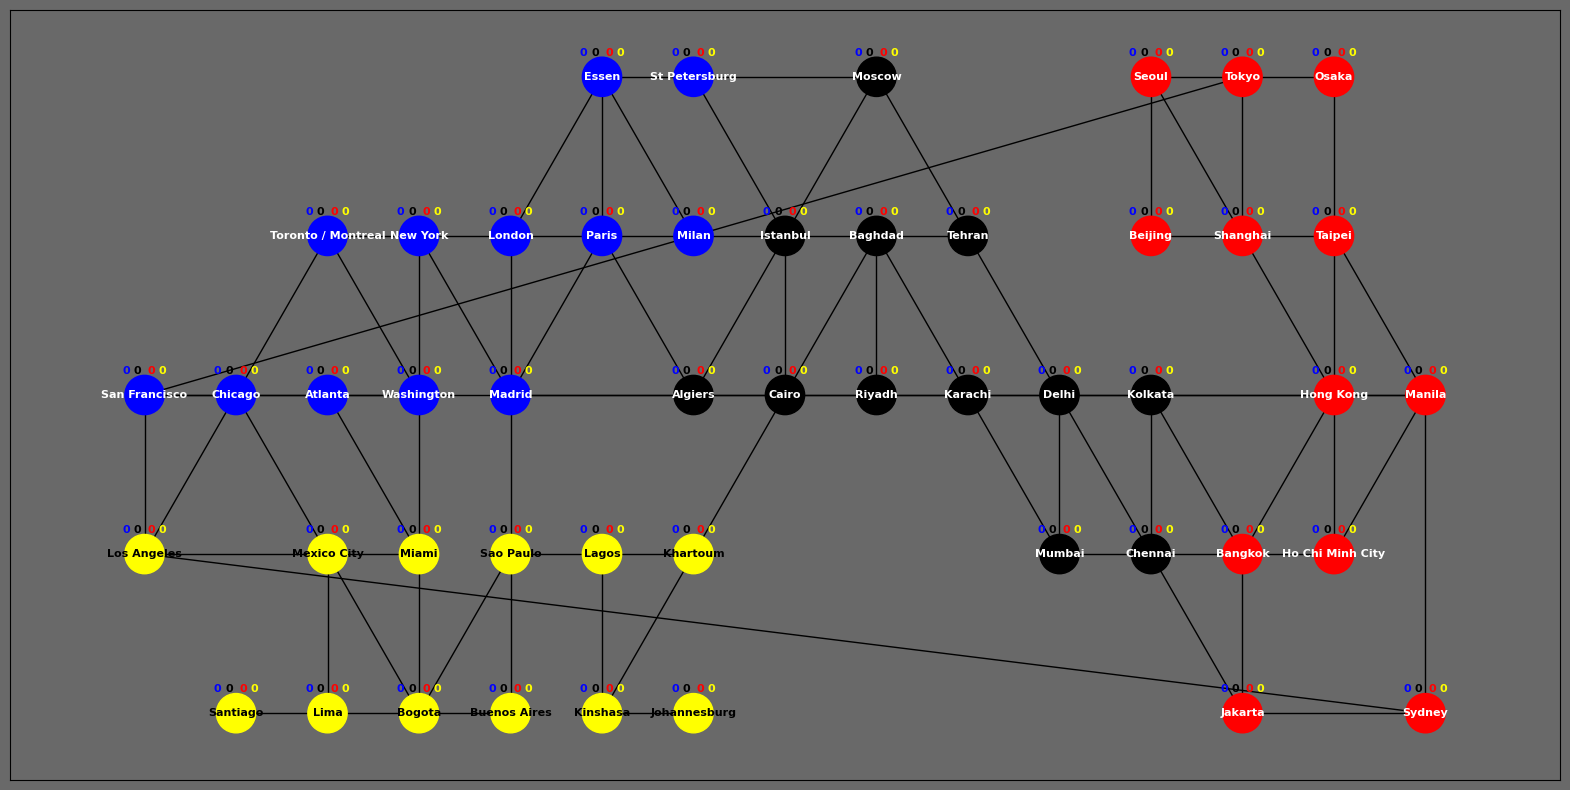

In [14]:

nx.set_node_attributes(Graph_gameboard, disease_counters, 'disease_counters')

fig, ax = plt.subplots(figsize=(20, 10))

#pos = nx.spring_layout(Graph_gameboard)
node_colors = [cities[city] for city in Graph_gameboard.nodes()]

# change font of nodes with yellow color
yellow_nodes = [city for city, color in cities.items() if color == 'yellow']
font_colors = {city: 'black' if city in yellow_nodes else 'white' for city in Graph_gameboard.nodes()}
# Draw the nodes
nx.draw_networkx_nodes(Graph_gameboard, pos=node_positions, node_color=node_colors, node_size=800)

# Draw the edges
nx.draw_networkx_edges(Graph_gameboard, pos=node_positions)

# Add labels manually with specified colors
for node, (x, y) in node_positions.items():
    plt.text(x, y, node, fontsize=8, ha='center', va='center', color=font_colors[node], weight='bold')

#nx.draw(Graph_gameboard, pos=node_positions, node_color=node_colors, with_labels=True, font_color='white', font_weight='bold', node_size=800, font_size=8, font_family='sans-serif')
#nx.draw(Graph_gameboard, pos, node_color=node_colors, with_labels=True, font_color='white', font_weight='bold', node_size=800, font_size=8, font_family='sans-serif')

ax.set_facecolor('#696969')
fig.set_facecolor('#696969')

font_colors_disease_counter = {city: 'black' if city in yellow_nodes else 'white' for city in Graph_gameboard.nodes()}

for node, (x, y) in node_positions.items():
    counters = Graph_gameboard.nodes[node]['disease_counters']

    # Construct labels for each counter with its color
    blue_label = f"{counters['blue']}"
    black_label = f"{counters['black']}"
    red_label = f"{counters['red']}"
    yellow_label = f"{counters['yellow']}"

    # Draw the text for each counter with its color
    plt.text(x - 4, y + 3, blue_label, fontsize=8, ha='center', va='center', color='blue', weight='bold')
    plt.text(x - 1.5, y + 3, black_label, fontsize=8, ha='center', va='center', color='black', weight='bold')
    plt.text(x + 1.5, y + 3, red_label, fontsize=8, ha='center', va='center', color='red', weight='bold')
    plt.text(x + 4, y + 3, yellow_label, fontsize=8, ha='center', va='center', color='yellow', weight='bold')


#for node, (x, y) in node_positions.items():
#    counters = Graph_gameboard.nodes[node]['disease_counters']
#    #label = f"B:{counters['blue']} K:{counters['black']} R:{counters['red']} Y:{counters['yellow']}"
#    label = f"{counters['blue']} {counters['black']} {counters['red']} {counters['yellow']}"
#    plt.text(x, y + 3, label, fontsize=8, ha='center', va='center', color='white', weight='bold')

plt.show()

In [1]:
def outbreak(node, color, outbreak_nodes=None):
    if outbreak_nodes is None:
        outbreak_nodes = set()  # Initialize the set of nodes that have had an outbreak
    outbreak_nodes.add(node)  # Add the current node to the set

    connected_nodes = Graph_gameboard.neighbors(node)
    print(connected_nodes)
    for cn in connected_nodes:
        if cn not in outbreak_nodes:  # Only process the node if it hasn't had an outbreak yet
            if(Graph_gameboard.nodes[cn]['disease_counters'][color] == 3):
                outbreak(cn, color, outbreak_nodes)
            else:
                Graph_gameboard.nodes[cn]['disease_counters'][color] += 1
                if(Graph_gameboard.nodes[cn]['disease_counters'][color] == 3):
                    outbreak(cn, color, outbreak_nodes)
#def outbreak(node, color):
#    connected_nodes = Graph_gameboard.neighbors(node)
#    print(connected_nodes)
#    for cn in connected_nodes:
#        if(Graph_gameboard.nodes[cn]['disease_counters'][color] == 3):
#            outbreak(cn , color)
#
#        else:
#            Graph_gameboard.nodes[cn]['disease_counters'][color] += 1
#            if(Graph_gameboard.nodes[cn]['disease_counters'][color] == 3):
#                outbreak(cn, color)

node = random.choice(list(Graph_gameboard.nodes))
node = 'San Francisco'
print(node)
print(cities[node])
color_of_node = cities[node]

if(Graph_gameboard.nodes[node]['disease_counters'][color_of_node] == 3):
    outbreak(node, color_of_node)
else :
    Graph_gameboard.nodes[node]['disease_counters'][color_of_node] += 1

    if(Graph_gameboard.nodes[node]['disease_counters'][color_of_node] == 3):
        outbreak(node, color_of_node)

print(Graph_gameboard.nodes[node]['disease_counters'][color_of_node])

NameError: name 'random' is not defined

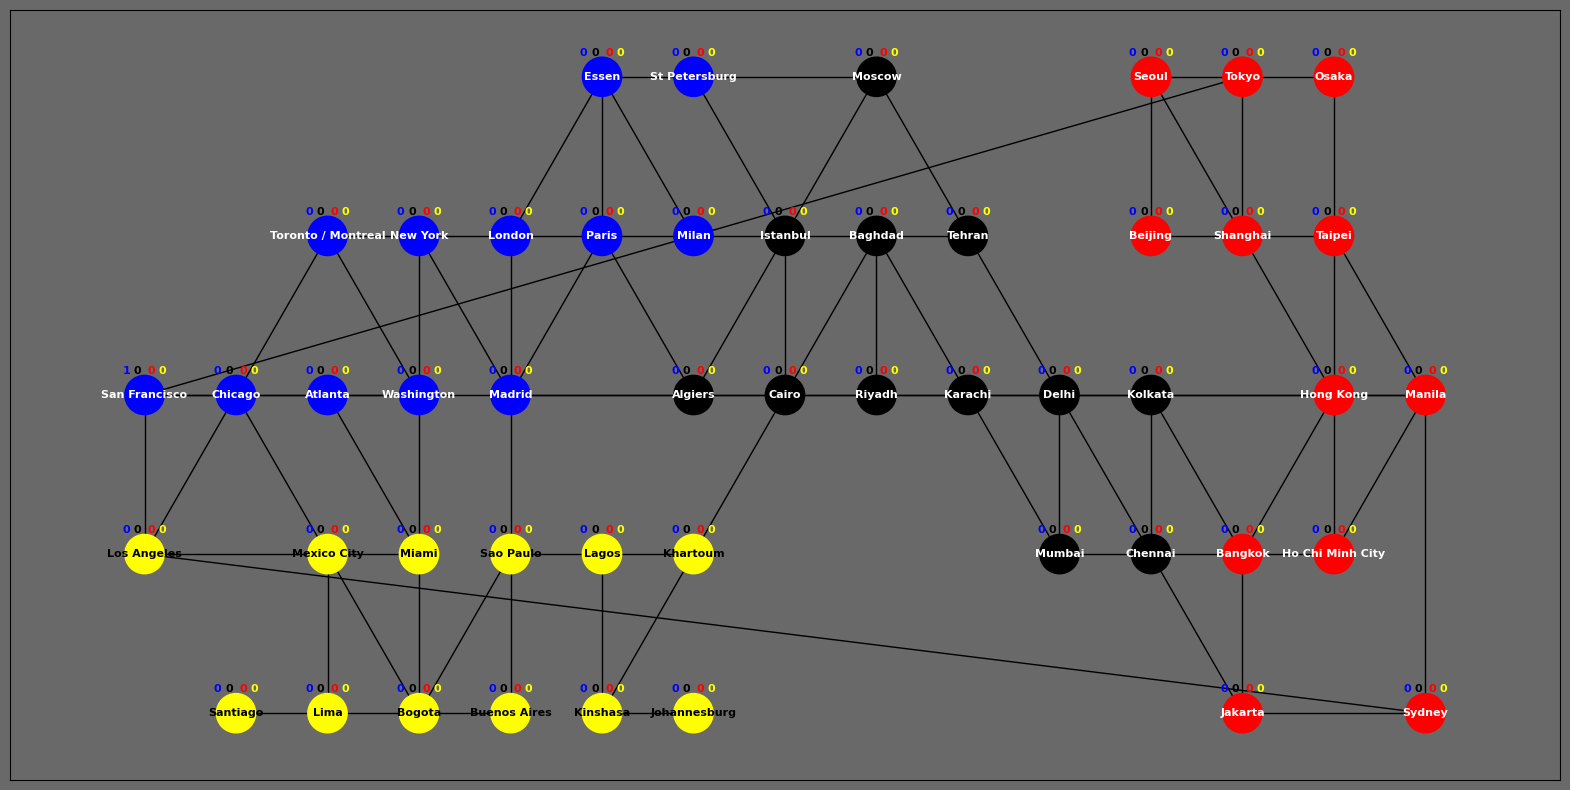

In [71]:
nx.set_node_attributes(Graph_gameboard, disease_counters, 'disease_counters')

fig, ax = plt.subplots(figsize=(20, 10))

#pos = nx.spring_layout(Graph_gameboard)
node_colors = [cities[city] for city in Graph_gameboard.nodes()]

# change font of nodes with yellow color
yellow_nodes = [city for city, color in cities.items() if color == 'yellow']
font_colors = {city: 'black' if city in yellow_nodes else 'white' for city in Graph_gameboard.nodes()}
# Draw the nodes
nx.draw_networkx_nodes(Graph_gameboard, pos=node_positions, node_color=node_colors, node_size=800)

# Draw the edges
nx.draw_networkx_edges(Graph_gameboard, pos=node_positions)

# Add labels manually with specified colors
for node, (x, y) in node_positions.items():
    plt.text(x, y, node, fontsize=8, ha='center', va='center', color=font_colors[node], weight='bold')

#nx.draw(Graph_gameboard, pos=node_positions, node_color=node_colors, with_labels=True, font_color='white', font_weight='bold', node_size=800, font_size=8, font_family='sans-serif')
#nx.draw(Graph_gameboard, pos, node_color=node_colors, with_labels=True, font_color='white', font_weight='bold', node_size=800, font_size=8, font_family='sans-serif')

ax.set_facecolor('#696969')
fig.set_facecolor('#696969')

font_colors_disease_counter = {city: 'black' if city in yellow_nodes else 'white' for city in Graph_gameboard.nodes()}

for node, (x, y) in node_positions.items():
    counters = Graph_gameboard.nodes[node]['disease_counters']

    # Construct labels for each counter with its color
    blue_label = f"{counters['blue']}"
    black_label = f"{counters['black']}"
    red_label = f"{counters['red']}"
    yellow_label = f"{counters['yellow']}"

    # Draw the text for each counter with its color
    plt.text(x - 4, y + 3, blue_label, fontsize=8, ha='center', va='center', color='blue', weight='bold')
    plt.text(x - 1.5, y + 3, black_label, fontsize=8, ha='center', va='center', color='black', weight='bold')
    plt.text(x + 1.5, y + 3, red_label, fontsize=8, ha='center', va='center', color='red', weight='bold')
    plt.text(x + 4, y + 3, yellow_label, fontsize=8, ha='center', va='center', color='yellow', weight='bold')


#for node, (x, y) in node_positions.items():
#    counters = Graph_gameboard.nodes[node]['disease_counters']
#    #label = f"B:{counters['blue']} K:{counters['black']} R:{counters['red']} Y:{counters['yellow']}"
#    label = f"{counters['blue']} {counters['black']} {counters['red']} {counters['yellow']}"
#    plt.text(x, y + 3, label, fontsize=8, ha='center', va='center', color='white', weight='bold')

plt.show()